## Gender Bias TSNE Plot

This completes question 3.2.3 of the assignment.

In [1]:
from code import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
tsne = TSNE(n_components=2, random_state=0, perplexity=3, init='random', learning_rate='auto')

### Setup

In [3]:
# Prefilled code showing you how to use the helper functions
print("Loading glove embeddings...")
word_to_embedding = load_glove_embeddings("data/glove/glove.6B.300d.txt")

print("Loading professions...")
professions = load_professions("data/professions.tsv")

print("Loading gender attribute_words...")
gender_attribute_words = load_gender_attribute_words(
    "data/gender_attribute_words.json"
)

Loading glove embeddings...
Loading professions...
Loading gender attribute_words...


In [4]:
# === Section 2.1 ===
gender_subspace = compute_gender_subspace(
    word_to_embedding, gender_attribute_words=[["man", "woman"], ["boy", "girl"]]
).flatten()

In [5]:
# === Section 2.2 ===
a = word_to_embedding["doctor"]
b = word_to_embedding["nurse"]
scalar_projection, vector_projection = project(a, gender_subspace)

In [6]:
# === Section 2.3 ===
profession_to_embedding = compute_profession_embeddings(
    word_to_embedding, professions
)

In [7]:
# === Section 2.4 ===
max_words = compute_extreme_words(
    professions, word_to_embedding, gender_subspace, k=10, max_=True
)
min_words = compute_extreme_words(
    professions, word_to_embedding, gender_subspace, k=10, max_=False
)

print(f"Max profession words: {max_words}")
print(f"Min profession words: {min_words}")

Max profession words: ['dietitian', 'receptionist', 'salesperson', 'housekeeper', 'registered nurse', 'vocational nurse', 'childcare worker', 'hairdresser', 'paralegal', 'dental hygienist']
Min profession words: ['security system installer', 'operating engineer', 'mobile equipment mechanic', 'conductor', 'crossing guard', 'mining machine operator', 'lodging manager', 'repairer', 'bus mechanic', 'heating mechanic']


In [8]:
max_embeddings = [profession_to_embedding[word] for word in max_words]
min_embeddings = [profession_to_embedding[word] for word in min_words]

In [13]:
X = np.vstack([max_embeddings, min_embeddings])
X

array([[-0.24702  ,  0.24949  , -0.15179  , ...,  0.33809  , -0.079118 ,
        -0.1285   ],
       [-0.46467  ,  0.27978  ,  0.14415  , ...,  0.059517 , -0.38888  ,
         0.82876  ],
       [-0.71178  ,  0.71026  ,  0.09052  , ...,  0.84015  ,  0.2412   ,
         0.29787  ],
       ...,
       [ 0.3878   ,  0.11285  , -0.22912  , ...,  0.53522  ,  0.079185 ,
        -0.11112  ],
       [ 0.268425 , -0.2183   ,  0.036925 , ..., -0.19445  , -0.056995 ,
         0.440305 ],
       [ 0.473415 ,  0.01676  , -0.0349775, ..., -0.49576  , -0.401525 ,
         0.56272  ]])

In [14]:
max_tsne = tsne.fit_transform(X)
max_tsne

array([[  98.08771 ,  -11.379325],
       [  53.321194,   83.49068 ],
       [  77.15585 ,   99.60189 ],
       [  38.84121 ,   58.733517],
       [  95.34639 ,   14.526352],
       [  95.40329 ,   33.21109 ],
       [  76.36173 ,   50.070362],
       [  32.180008,   90.602684],
       [  44.07222 ,  124.0232  ],
       [ 121.542496,   44.854485],
       [ -45.427086, -130.61368 ],
       [ -77.19936 , -128.64453 ],
       [ -65.123856, -109.17071 ],
       [ -84.57336 , -157.25047 ],
       [-120.3595  , -124.72593 ],
       [ -83.44449 , -100.70241 ],
       [ -77.88478 ,  -65.58553 ],
       [ -22.35925 , -146.37653 ],
       [ -44.121483,  -89.99364 ],
       [ -20.339025,  -84.865524]], dtype=float32)

In [32]:
profession_df = pd.DataFrame({'profession': max_words + min_words, 'x': max_tsne[:,0], 'y': max_tsne[:,1], 'type': ['max'] * 10 + ['min'] * 10})
profession_df

,profession,x,y,type
0,dietitian,98.087708,-11.379325,max
1,receptionist,53.321194,83.490677,max
2,salesperson,77.155853,99.601891,max
3,housekeeper,38.841209,58.733517,max
4,registered nurse,95.346390,14.526352,max
5,vocational nurse,95.403290,33.211090,max
6,childcare worker,76.361732,50.070362,max
7,hairdresser,32.180008,90.602684,max
8,paralegal,44.072220,124.023201,max
9,dental hygienist,121.542496,44.854485,max


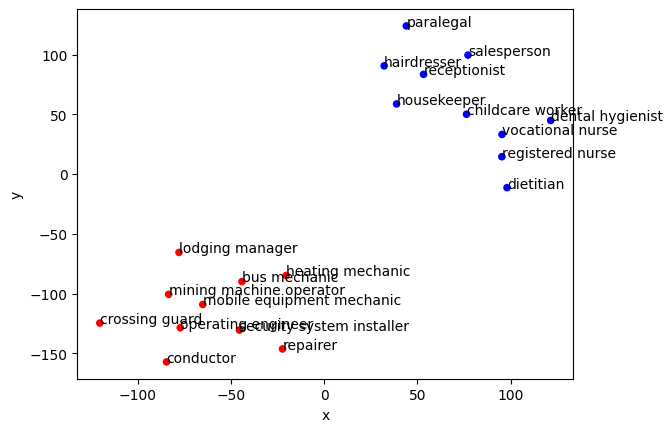

In [37]:
fig, ax = plt.subplots()
profession_df.plot(kind='scatter', x='x', y='y', c=profession_df.type.map({'max': 'blue', 'min': 'red'}), ax=ax)

for i, row in profession_df.iterrows():
    ax.text(row['x'], row['y'], row['profession'])